In [ ]:
!pip install -Uqq fastai
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.8/232.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 12.8 MB/s eta 0:00:00


In [ ]:
foodPath = untar_data(URLs.FOOD)

In [ ]:
#How many images are we dealing with
len(get_image_files(foodPath))

2000

In [ ]:
#Use Pandas to parse the JSON as a human readable table
pd.read_json('/root/.fastai/data/food-101/test.json')

churros          hot_and_sour_soup          samosa  \
0    churros/1061830  hot_and_sour_soup/1000486  samosa/1009326   
1    churros/1064042  hot_and_sour_soup/1004564  samosa/1024186   
2    churros/1074903  hot_and_sour_soup/1011278  samosa/1036216   
3    churros/1085259  hot_and_sour_soup/1029400   samosa/103689   
4    churros/1097261  hot_and_sour_soup/1044215  samosa/1052427   
..               ...                        ...             ...   
245   churros/904526   hot_and_sour_soup/963551   samosa/917040   
246   churros/937430   hot_and_sour_soup/968546   samosa/929017   
247   churros/938480   hot_and_sour_soup/982582   samosa/937665   
248    churros/95272   hot_and_sour_soup/984258   samosa/960937   
249   churros/982131   hot_and_sour_soup/998326   samosa/972581   

             sashimi          pork_chop          spring_rolls  \
0     sashimi/100113  pork_chop/1012227  spring_rolls/1005480   
1    sashimi/1017182  pork_chop/1019077   spring_rolls/103010   
2    sashimi/1043094   pork_chop/102958  spring_rolls/1036175   
3    sashimi/1050391  pork_chop/1040432  spring_rolls/1044858   
4      sashimi/10551  pork_chop/1045605  spring_rolls/1067952   
..               ...                ...                   ...   
245   sashimi/889209    pork_chop/92293   spring_rolls/949343   
246   sashimi/893381   pork_chop/929555   spring_rolls/950371   
247   sashimi/938288   pork_chop/934946   spring_rolls/951951   
248   sashimi/981801   pork_chop/942955   spring_rolls/990689   
249   sashimi/988502   pork_chop/948226   spring_rolls/999961   

             panna_cotta          beef_tartare          greek_salad  \
0    panna_cotta/1006650   beef_tartare/101073  greek_salad/1010850   
1    panna_cotta/1027460  beef_tartare/1029120  greek_salad/1029680   
2    panna_cotta/1030883  beef_tartare/1030025  greek_salad/1053670   
3     panna_cotta/103712  beef_tartare/1031053  greek_salad/1062715   
4    panna_cotta/1050629  beef_tartare/1066933  greek_salad/1101710   
..                   ...                   ...                  ...   
245    panna_cotta/97960   beef_tartare/926143   greek_salad/949442   
246   panna_cotta/980326   beef_tartare/948352   greek_salad/961722   
247   panna_cotta/981405   beef_tartare/956509   greek_salad/968471   
248    panna_cotta/98261   beef_tartare/976175   greek_salad/995103   
249   panna_cotta/985635   beef_tartare/984112   greek_salad/995575   

             foie_gras  ...          chicken_quesadilla          pho  \
0    foie_gras/1007306  ...    chicken_quesadilla/10257  pho/1002382   
1    foie_gras/1044237  ...  chicken_quesadilla/1030292  pho/1020153   
2    foie_gras/1073688  ...  chicken_quesadilla/1052529  pho/1026354   
3    foie_gras/1113614  ...  chicken_quesadilla/1096804  pho/1028507   
4    foie_gras/1125178  ...  chicken_quesadilla/1102036  pho/1029709   
..                 ...  ...                         ...          ...   
245   foie_gras/953456  ...   chicken_quesadilla/921154   pho/964800   
246   foie_gras/961263  ...   chicken_quesadilla/924555   pho/965012   
247   foie_gras/982330  ...     chicken_quesadilla/9290   pho/982022   
248    foie_gras/98353  ...    chicken_quesadilla/94597   pho/990037   
249   foie_gras/989151  ...   chicken_quesadilla/959209   pho/996595   

             prime_rib          cheesecake          ice_cream  \
0    prime_rib/1006976  cheesecake/1023543  ice_cream/1004744   
1     prime_rib/102197   cheesecake/102854  ice_cream/1031536   
2     prime_rib/102813  cheesecake/1073148  ice_cream/1075106   
3    prime_rib/1035695  cheesecake/1092082  ice_cream/1100243   
4     prime_rib/105375  cheesecake/1096018  ice_cream/1106165   
..                 ...                 ...                ...   
245   prime_rib/940800   cheesecake/970606   ice_cream/880755   
246   prime_rib/941938   cheesecake/972877   ice_cream/891533   
247   prime_rib/956130   cheesecake/996516   ice_cream/923525   
248   prime_rib/958647   cheesecake/996918   ice_cream/9951

In [ ]:
#Deciding which two foods we want to classify
labelA = 'tacos'
labelB = 'ice_cream'

In [ ]:
#Loop through all Images downloaded
for img in get_image_files(foodPath):
  #Rename Images so that the Label (Samosa or Churros) is in the file name
  if labelA in str(img):
    img.rename(f"{img.parent}/{labelA}-{img.name}")
  elif labelB in str(img):
    img.rename(f"{img.parent}/{labelB}-{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB

len(get_image_files(foodPath))

2000

In [ ]:
def GetLabel(fileName):
  return fileName.split('-')[0]

GetLabel("ice_cream-1004744.jpg") # Testing

'ice_cream'

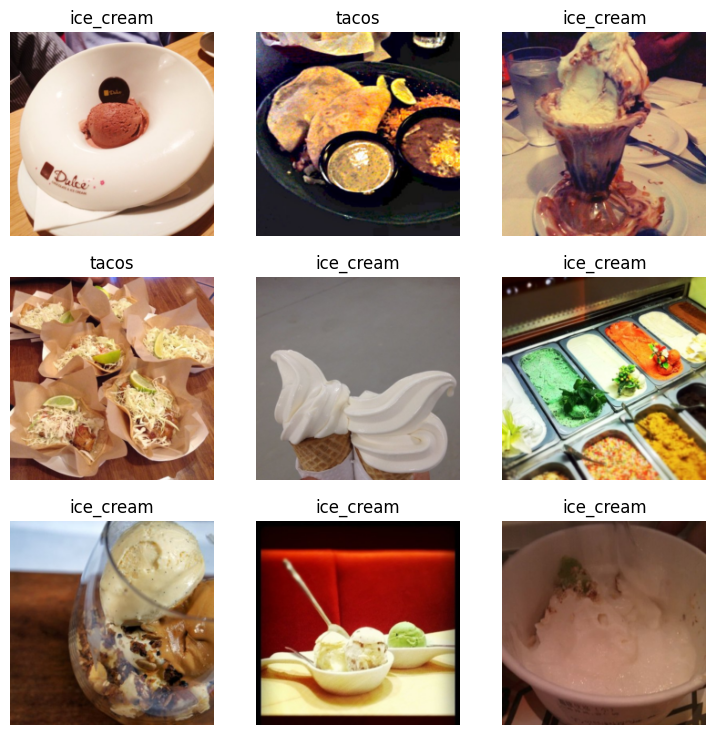

In [ ]:
dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=420,
    label_func=GetLabel, item_tfms=Resize(224))

dls.train.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=10)

Saving test-4.jpeg to test-4.jpeg


This is a ice_cream.
tacos 0.083592
ice_cream 0.916408


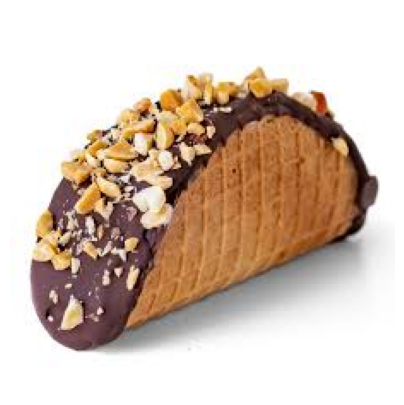

In [ ]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)
print(f"This is a {label}.")
print(f"{labelA} {probs[1].item():.6f}")
print(f"{labelB} {probs[0].item():.6f}")

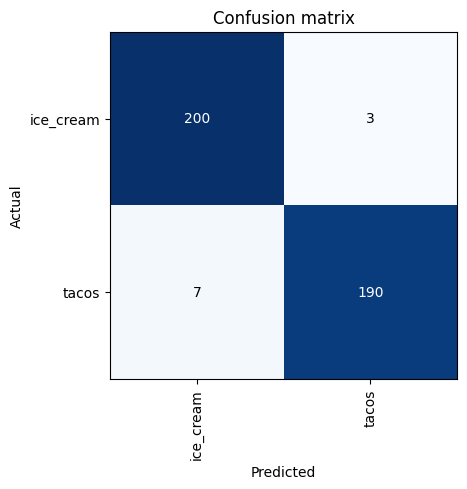

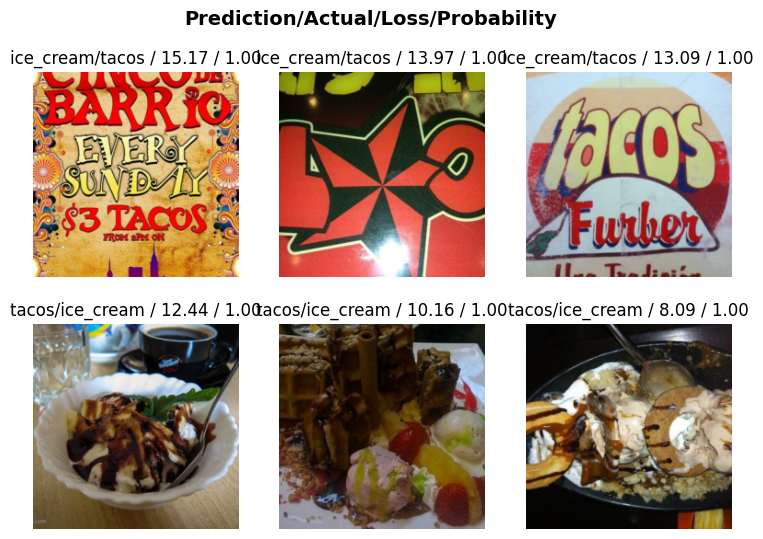

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(6)

In [ ]:
learn.export() # .pkl

In [ ]:
modelPath = get_files(foodPath, extensions='.pkl')[0]
modelPath

Path('/root/.fastai/data/food-101/export.pkl')

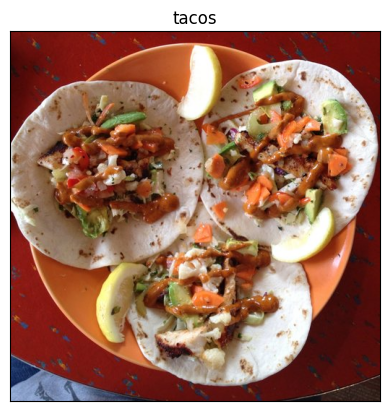

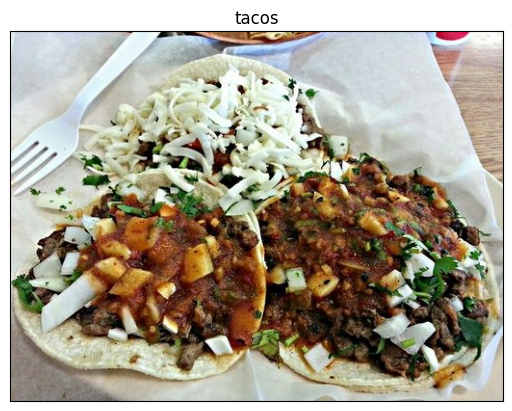

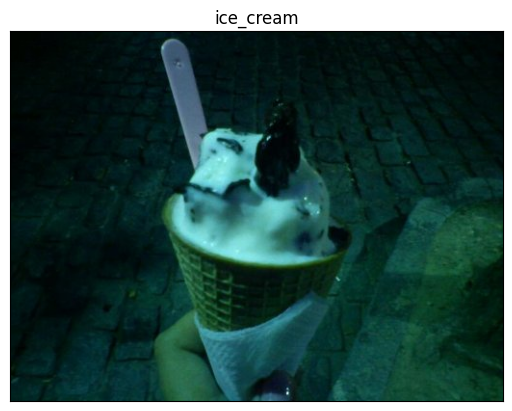

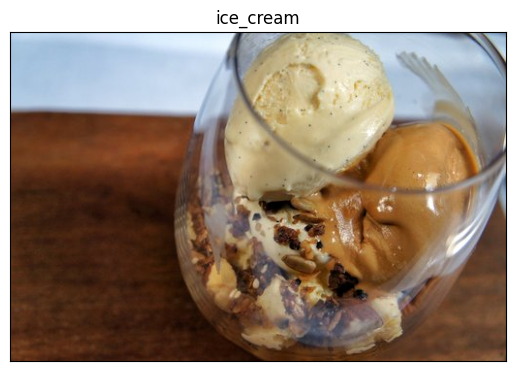

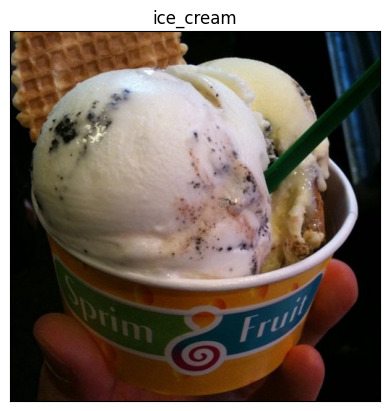

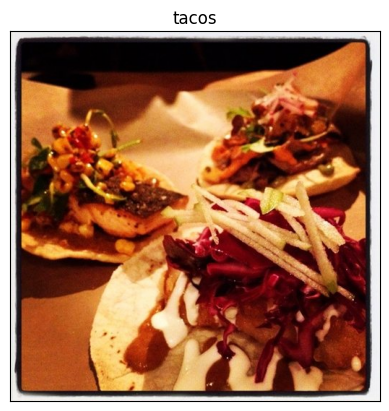

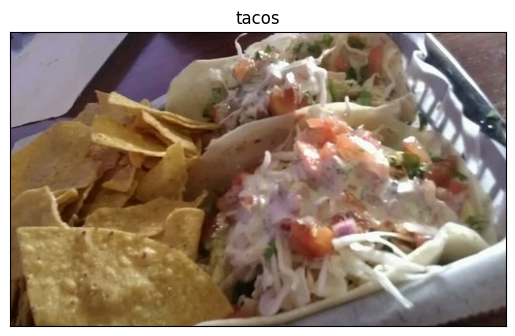

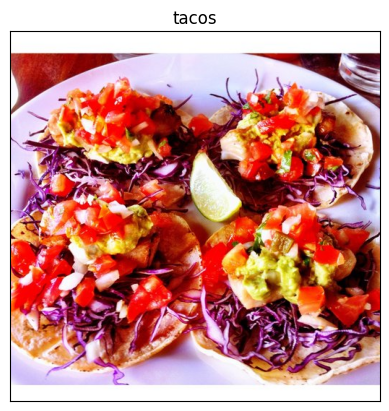

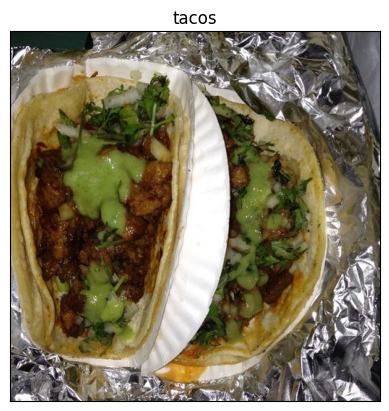

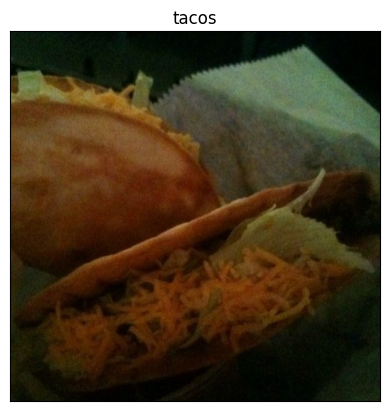

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  # Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  # Put into Model
  label,_,probs = learn.predict(img)

  # Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() # Add subplot (for multiple images)
  imgplot = plt.imshow(img) # Add image into plot
  ax.set_title(label) # Set Headline to predicted label

  # Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

In [ ]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[0]))

('tacos', tensor(1), tensor([6.4446e-15, 1.0000e+00]))

In [ ]:
learn_inf.dls.vocab # Get the labels

['ice_cream', 'tacos']

In [ ]:
from google.colab import files
files.download(modelPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>